# Потенциальные вкладчики для банка. ML: классификация

## Постановка задачи:

Банки хранят огромные объёмы информации о своих клиентах. Эти данные можно использовать для того, чтобы оставаться на связи с клиентами и индивидуально ориентировать их на подходящие именно им продукты или банковские предложения.

Обычно с выбранными клиентами связываются напрямую через разные каналы связи: лично (например, при визите в банк), по телефону, по электронной почте, в мессенджерах и так далее. Этот вид маркетинга называется **прямым маркетингом**. На самом деле, прямой маркетинг используется для взаимодействия с клиентами в большинстве банков и страховых компаний. Но, разумеется, проведение маркетинговых кампаний и взаимодействие с клиентами — это трудозатратно и дорого.

<p style="background:#F5F5F5;border:1px #000000  solid;padding: 15px 0 20px 20px; text-align:left;">→ Банкам хотелось бы уметь выбирать среди своих клиентов именно тех, которые с наибольшей вероятностью воспользуются тем или иным предложением, и связываться именно с ними.</p>

<p style="background:#D9FFAD;  border:1px #000000  solid;padding: 15px 0 20px 20px; text-align:left;">Нам предоставили данные о последней маркетинговой кампании, которую проводил банк: задачей было привлечь клиентов для открытия депозита. Необходимо проанализировать эти данные, выявить закономерность и найти решающие факторы, повлиявшие на то, что клиент вложил деньги именно в этот банк. В случае успеха увелим доходы банка и поможем понять целевую аудиторию, которую необходимо привлекать путём рекламы и различных предложений.</p>

<p style="border:1px #000000  dashed;padding: 15px 0 20px 20px; text-align:left;"><font color='green'><b>Бизнес-задача:</b></font> определить характеристики, по которым можно выявить клиентов, более склонных к открытию депозита в банке, и за счёт этого повысить результативность маркетинговой кампании.
<br><br>
<font color='green'><b>Техническая задача для вас как для специалиста в Data Science:</b></font> построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать, воспользуется он предложением об открытии депозита или нет.</p>

Проект будет состоять из пяти частей:

1. **Первичная обработка данных**

    В рамках этой части вам предстоит обработать пропуски и выбросы в данных. Это необходимо для дальнейшей работы с ними.

2. **Разведывательный анализ данных (EDA)**

    Вам необходимо будет исследовать данные, нащупать первые закономерности и выдвинуть гипотезы.

3. **Отбор и преобразование признаков**

    На этом этапе вы перекодируете и преобразуете данные таким образом, чтобы их можно было использовать при решении задачи классификации. Если на первом этапе вы лишь избавите данные от ненужных артефактов, то на этом шаге совершите действия, более важные для подготовки данных к задаче классификации, уже понимая их структуру.

4. **Решение задачи классификации: логистическая регрессия и решающие деревья**

    На данном этапе вы построите свою первую прогностическую модель и оцените её качество. Вы научитесь подбирать оптимальные параметры модели для того, чтобы получить наилучший результат для конкретного алгоритма.

5. **Решение задачи классификации: ансамбли моделей и построение прогноза**

Загружаем необходимые библиотеки.

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder,OrdinalEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import GridSearchCV
import optuna
import time

## 1. Знакомство с данными, обработка пропусков и выбросов.

<p style="border:2px #000000  solid;padding: 15px 0 20px 20px;text-align:left;">✍ Начнём наше исследование со знакомства с данными.</p>
Какие данные нам предоставили, чтобы мы могли выявить решающие факторы для успеха маркетинговой кампании? В целом их можно разделить на несколько групп.

<p style="background:#F5F5F5;border:1px #000000  solid;padding: 15px 0 20px 20px; text-align:left;"><b>Данные о клиентах банка:</b>
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>age</y> (возраст);
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>job</y> (сфера занятости);
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>marital</y> (семейное положение);
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>education</y> (уровень образования);
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>default</y> (имеется ли просроченный кредит);
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>housing</y> (имеется ли кредит на жильё);
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>loan</y> (имеется ли кредит на личные нужды);
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>balance</y> (баланс).
<br><br>
<b>Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:</b>
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>contact</y> (тип контакта с клиентом);
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>month</y> (месяц, в котором был последний контакт);
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>day</y> (день, в который был последний контакт);
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>duration</y> (продолжительность контакта в секундах).
<br><br>
<b>Прочие признаки:</b>
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>campaign</y> (количество контактов с этим клиентом в течение текущей кампании);
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>pdays</y> (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>previous</y> (количество контактов до текущей кампании)
<br><br>
▪️ <style>y {background: #FFFF00;}</style><y>poutcome</y> (результат прошлой маркетинговой кампании).
<br><br>
И, разумеется, наша <b>целевая переменная</b> <style>y {background: #FFFF00;}</style><y>deposit</y>, которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе.</p>

____

<p style="background:#F5F5F5;border:1px #000000  solid;padding: 15px 0 20px 20px; text-align:left;">Начнём с того, что оценим, насколько предложенные данные готовы к дальнейшему анализу. В первую очередь давайте выясним, есть ли в данных пропущенные значения (пустые, незаполненные ячейки).</p>

### 1.1. Считываем данные.

In [120]:
# cчитываем данные
df = pd.read_csv('data/bank_fin.csv', sep = ';')
df.head(3)

age         job  marital  education default       balance housing loan  \
0   59      admin.  married  secondary      no   2 343,00 $      yes   no   
1   56      admin.  married  secondary      no      45,00 $       no   no   
2   41  technician  married  secondary      no   1 270,00 $      yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may      1042         1     -1         0  unknown     yes  
1  unknown    5   may      1467         1     -1         0  unknown     yes  
2  unknown    5   may      1389         1     -1         0  unknown     yes

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


Исходные данные состоят из 16 признаков, где:
- признак ***deposit*** - целевой признак;
- 6 числовых и 11 категориальныхж;
- в признаке *balance* есть пропуски.

In [122]:
# количественные переменные
num_cols = [key for key in df.dtypes.to_dict() if df.dtypes.to_dict()[key] != 'object']

# категориальные переменные
cat_cols = [key for key in df.dtypes.to_dict() if df.dtypes.to_dict()[key] == 'object']

### 1.2. Исследуйем данные на предмет пропусков.

In [123]:
# Выведем признаки с числом пропусков больше 0.
df.isnull().sum().loc[lambda x: x>0]

balance    25
dtype: int64

❓Есть ли пропуски в других данных

In [124]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
print(df['job'].unique())

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']


>Можно заметить, что значение *unknown* является заменом пропуска в данных.

### 1.3. Преобразование пропусков.

Преобразуем признак *balance* таким образом, чтобы он корректно считывался, как вещественное число (float)

In [125]:
# Заменим символы, чтобы после преобрезовать данные во float
df['balance'] = df['balance'][~df['balance'].isnull()].apply(lambda x: x.replace('$',''))
df['balance'] = df['balance'][~df['balance'].isnull()].apply(lambda x: x.replace(',','.'))
df['balance'] = df['balance'][~df['balance'].isnull()].apply(lambda x: x.replace(' ',''))

# Преобразуем данные во float
df['balance'] = df['balance'].astype('float64')

### 1.4. Заполнение пропусков

Заполним пропуски в признаке *balance* медианным значением.

In [126]:
# Заполняем пропуски
df['balance'].fillna(df['balance'].median(),inplace=True)

Заменим пропуски в *job* и *education* модальным значением. Пропуски в этих признаках с значением *unknown*.

In [127]:
# Выведем модальное значение 
print(f'Модальное значение "job": {df["job"].mode()[0]}')
print(f'Модальное значение "education": {df["education"].mode()[0]}')

Модальное значение "job": management
Модальное значение "education": secondary


In [128]:
# Сортируем значение по частоте встречаемости 
df[['job','education']].value_counts().sort_values(ascending=False).head()

job          education
management   tertiary     2178
technician   secondary    1209
blue-collar  secondary    1116
admin.       secondary    1084
services     secondary     746
dtype: int64

<p style="background:#F5F5F5;border:1px #000000  solid;padding: 15px 0 20px 20px; text-align:left;">Сгруппировав признаки <style>y {background: #FFFF00;}</style><y>job</y> и <y>education</y> по частоте встречаемости, выяснелось, что самым распростронённым является случаи <y>job : management</y> и <y>education : tertiary</y>. Модальное значение по отдельным признака отличается от частоты сгруппированых признаков, следовательно заполнение пропусков в признаках модальными значениями не совсем правильно. 
<br><br>
Так к примеру <y>unknow</y> в профессии <y>management</y> c образованием <y>tertiary</y> может быть заполнен значение <y>secondary</y>, что <b>не совсем корректно</b>. Такая же связь может прослеживать не только в по отношению к этим признакам, но и к другим.
<br><br>
Для решения даного проблеммы лучше всего было бы предсказать значения на имеющихся данных с помощью <i>ML</i>, а пока произведём заполнение пропусков модальным значением признаков.</p>

In [129]:
df['job'] = df['job'].apply(
    lambda x: df['job'].mode()[0] if x == 'unknown' else x)
df['education'] = df['education'].apply(
    lambda x: df['education'].mode()[0] if x == 'unknown' else x)

>В других признаках так же встречаются пропуски под именем *unknown*, оставим их пока как отдельную группу.

### 1.5. Обработка выбросов.

Построим коробчатый график признака *balance*

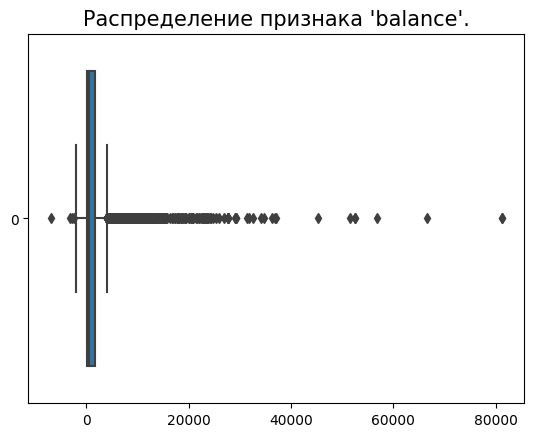

In [130]:
sns.boxplot(df['balance'],orient='h')
plt.title("Распределение признака 'balance'.",fontsize=15);

>График через чур сжат, что говорит о наличии выбрасов.
 
Определим выбросы признака *balance* с помощью межквартильного размаха и удалим их.

Напишем функцию **outliers_iqr**, которая задаёт границы для определения выбросов. В качестве нижней граници возьмём ($Q1-1.5*IQR$), а верхней ($Q3-1.5*IQR$), где:
- $Q1$ - 25 квантиль, $Q3$ - 75 квантиль;
- $IQR$ - межквантильный размах.

In [131]:
def outliers_iqr(data,feature,left=1.5,right=1.5):
    x = data[feature]
    quartile_1,quartile_3 = x.quantile(0.25),x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    print(f'lower_bound = {lower_bound}')
    print(f'upper_bound = {upper_bound}')
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers,cleaned

In [132]:
# Определим наличие выбросов и удалим их из данных
outliers,df = outliers_iqr(df,'balance')
print(f'Число выбросов: {outliers.shape[0]}')
print(f'Результирующее число записей: {df.shape[0]}')

lower_bound = -2241.0
upper_bound = 4063.0
Число выбросов: 1057
Результирующее число записей: 10105


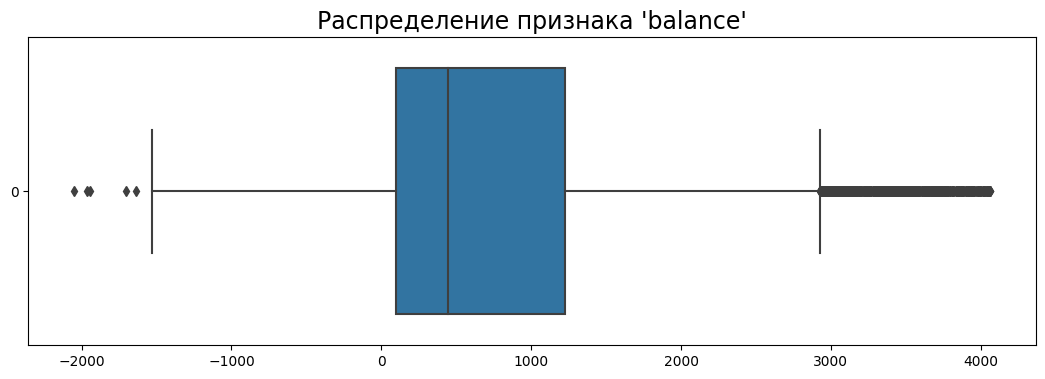

In [133]:
plt.figure(figsize=(13,4))
sns.boxplot(df['balance'],orient='h')
plt.title("Распределение признака 'balance'",fontsize=17);

>Теперь график признак *balance* выглядит значительно лучше. На нём видно, что среднее значение $\approx 400$, где $Q25\approx 50$, а $Q75\approx 1200$

## 2. Разведывательный анализ

### 2.1. Сбалансированность целевого признака.

Проведём анализ на сбалансированность классов, но сперва перекодируем целевой признак, где *yes*: 1 , *no*: 0.

In [134]:
# Перекодирум целевой признак
df['deposit'] = df['deposit'].map({'yes':1,'no':0})

Число клиентов открывшихх депозит: 0


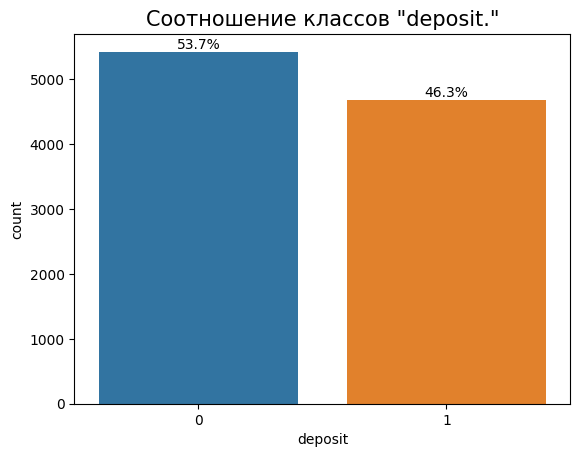

In [135]:
# проиллюстрируйте результат несбалансированности
sns.countplot(data=df.sort_values(by='deposit',ascending=True), x='deposit')

for i in range(len(df['deposit'].unique())):
    # Задаём точки для надписи на графике
    x = df['deposit'].value_counts().index.to_list()[i]               # позиция текста по оси x
    y = df['deposit'].value_counts().to_list()[i]                     # позиция текста по оси y
    s = round(df['deposit'].value_counts(normalize=True)[i]*100,1)    # текст натписи
    plt.text(x=i, y=y, s=f'{s}%', 
            horizontalalignment='center',                             # выравнивание текста
            verticalalignment='bottom'                                # положение текста
            )
plt.title('Соотношение классов "deposit."',fontdict={'fontsize':15});
print(f'Число клиентов открывшихх депозит: {len(df[df.deposit=="yes"])}')

>На графике ⬆️ присутствует небольшой дисбаланс.

### 2.2. Описательная характеристика числовых признаков.

Выведем числовые признаки.

In [136]:
# список всех количественных переменных 
num_list = [key for key in df.dtypes.to_dict() if df.dtypes.to_dict()[key] != 'object']
print(f'Количественные признаки:{num_list}')

Количественные признаки:['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'deposit']


Рассчитаем описательные статистики для числовых переменных.

In [137]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
df.describe()

age       balance           day      duration      campaign  \
count  10105.000000  10105.000000  10105.000000  10105.000000  10105.000000   
mean      40.895497    807.653538     15.590302    368.742603      2.517170   
std       11.734931    994.151966      8.441510    346.651524      2.707159   
min       18.000000  -2049.000000      1.000000      2.000000      1.000000   
25%       32.000000     95.000000      8.000000    137.000000      1.000000   
50%       38.000000    445.000000     15.000000    252.000000      2.000000   
75%       48.000000   1227.000000     22.000000    490.000000      3.000000   
max       95.000000   4063.000000     31.000000   3881.000000     43.000000   

              pdays      previous       deposit  
count  10105.000000  10105.000000  10105.000000  
mean      51.319644      0.816230      0.463236  
std      109.644179      2.243795      0.498671  
min       -1.000000      0.000000      0.000000  
25%       -1.000000      0.000000      0.000000  
50%       -1.000000      0.000000      0.000000  
75%        2.000000      1.000000      1.000000  
max      854.000000     58.000000      1.000000

По данным можно сказать, что:
- возраст *age* половины клиентов наоходится в диапазоне от 32 до 48 лет; самый молодой 18 лет(наступление совершеннолетия). Несомнено возраст должен влиять на показатель целевого признака.
- медианный баланс *balance* клиентов составляет 445$, т.е. люди в большей степени являются вклачиками; этот признак тоже будет хорошим показателем наличия депозита у клиента.
- *day* последний день(месяца) контакта с человеком не столь информативен, лучше построить признак сколько дней у человека депозит, так можно понять намерения людей(как долго хранят средства) и выделить возростные группы людей, как целевую аудиторию. 
- *duration* время контакта с клиентом в среднем состовляет 346 сек $\approx$ 5-6 мин. Как признак показывает заинтересованность клиента продуктом и также возможно напрямую будет влиять на признак *deposit*;
- *campaign, pdays, previous* признаки показывающие заинтересованность клиента и будут вероятней всего влиять напрямую на целевой признак;
- к признакам *duration, campaign, pdays, previous* лучше всего применить метода маштабирования, т.к. исходя из и точек max и min имеют большой разброс.


На графиках ниже можно проследить некоторую зависимость признаков, на котором цвет кружков отвечает за класс целевого признака. Оранжевый цвет отвечает за клинтов с депозитом.

<Figure size 640x480 with 0 Axes>

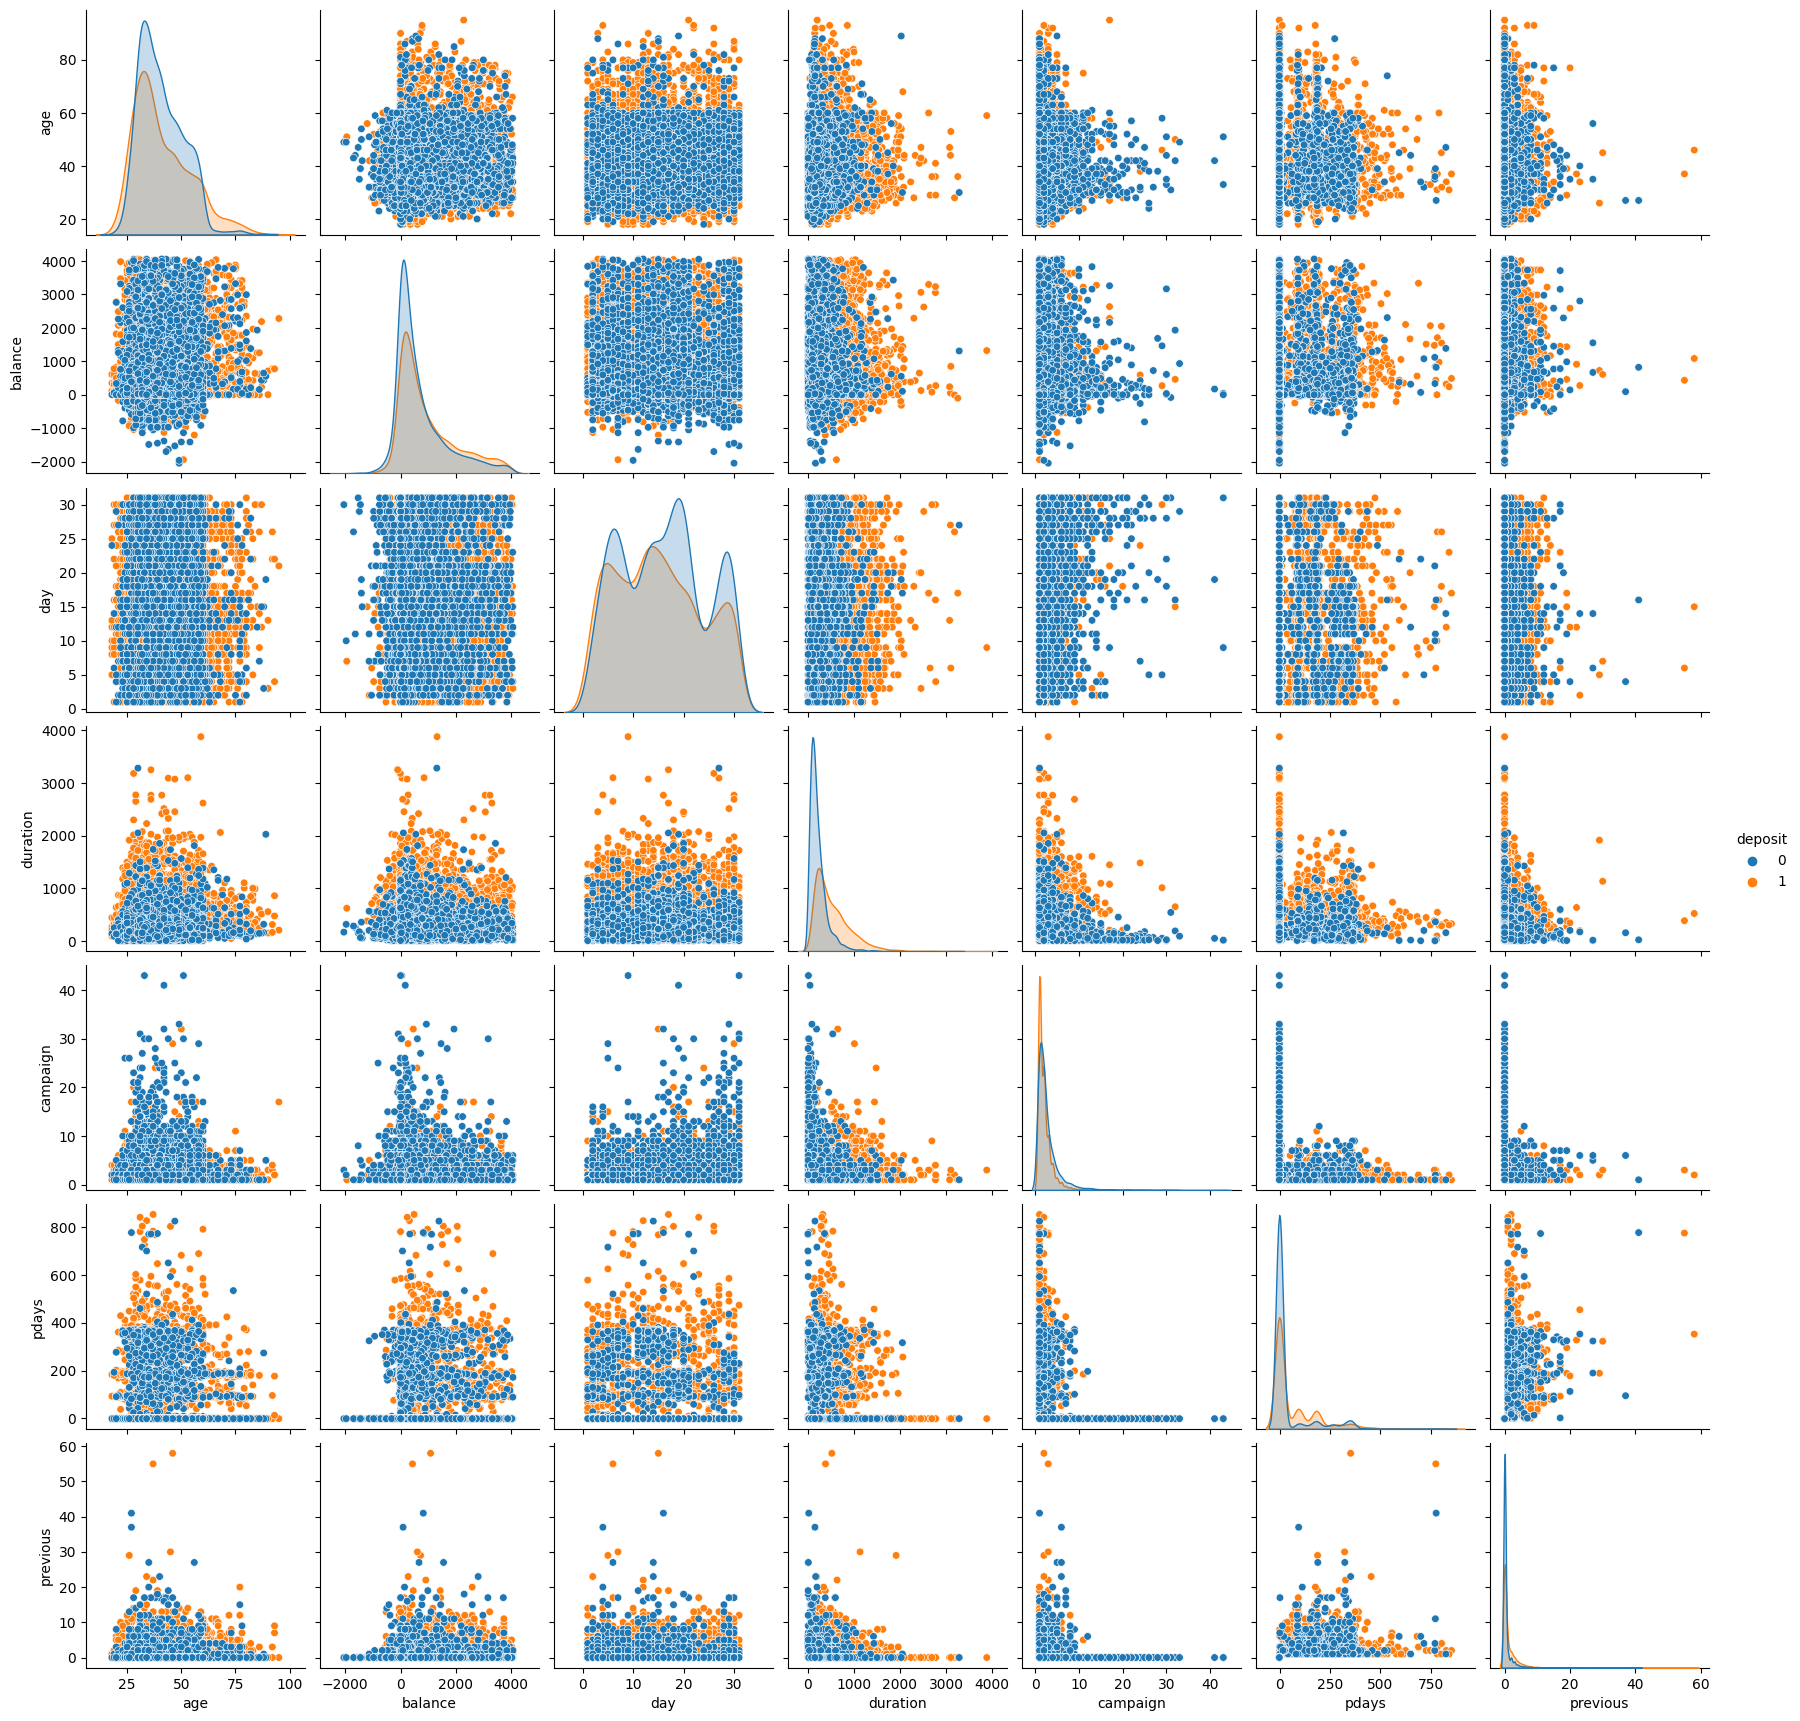

In [138]:
plt.figure()
sns.pairplot(df[num_list], hue= "deposit",
             plot_kws={"s": 30} # размер маркеров
             )
plt.show();

### 2.2. Описательная характеристика категориальных признаков.

Выведем категориальные признаки.

In [139]:
# список всех категориальных признаков 
cat_list = [key for key in df.dtypes.to_dict() if df.dtypes.to_dict()[key] == 'object']
print(f'Категориальные признаки:{cat_list}')

Категориальные признаки:['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


Рассчитаем описательные статистики для категориальных переменных.

In [140]:
df.describe(include='object')

job  marital  education default housing   loan   contact  \
count        10105    10105      10105   10105   10105  10105     10105   
unique          11        3          3       2       2      2         3   
top     management  married  secondary      no      no     no  cellular   
freq          2315     5715       5517    9939    5243   8712      7283   

        month poutcome  
count   10105    10105  
unique     12        4  
top       may  unknown  
freq     2617     7570

>В описательной таблице видно:
- в признаке **job** всего 11 профессии, самая популярная **management**;
- признак **marital** семейное положение больше половины семейные пары.
- образование **education** у большинства среднее;
- у 1,64% из числа клиентов просроченый кредит **default**;
- у половины клиентов кредит на жильё **housing**;
- 13,8% клиентов имеет кредит на личные нужды **loan**;
- связь с клиентами в большинстве через сотовую связь;
- признак **poutcome** результат прошлой маркетинговой компании в 75% случаев не известен, следует удалить признак как не информативный либо попытатся спрогнозирвать значение на имеющихся данных.

Визуализируем категориальные признаки:

In [141]:
# Функция для построения круговой диаграммы
def visual_cat_feature(data,name_feature,axes):
    # Сохраняем порядок значений выводимых данных
    oreder=df[name_feature].value_counts().index.to_list()
    # Преобразуем данные
    df_1 = df[[name_feature,'deposit']].value_counts()
    df_1 = df_1.reset_index()
    # Сортируем данные по списку 
    df_1[name_feature] = pd.Categorical(df_1[name_feature], ordered=True, categories=oreder)
    df_1=df_1.sort_values(name_feature)
    df_1 = df_1.set_index(['deposit'])
    
    # задаём цветовую линеку для графика
    outer_colors=['g','r','c','m','y','k','w','b']
    inner_colors=['lightblue','lightyellow']
    # fig, ax = plt.subplots(figsize=(6,6))
    size=0.3

    ax.pie(df[name_feature].value_counts(), radius=1, colors=outer_colors,
        wedgeprops=dict(width=size, edgecolor='w'),startangle=90,
        pctdistance=0.85, autopct='%1.1f%%',labels=df[name_feature].value_counts().index)

    # Внутренняя 
    ax.pie(df_1[0], radius=1-size, colors=inner_colors,
        wedgeprops=dict(width=size, edgecolor='w'),startangle=90,
        labels=df_1.index, labeldistance=0.75)

    # Название графика, выарвнивение
    ax.set(aspect="equal",title=(name_feature))
    
    return ax
        

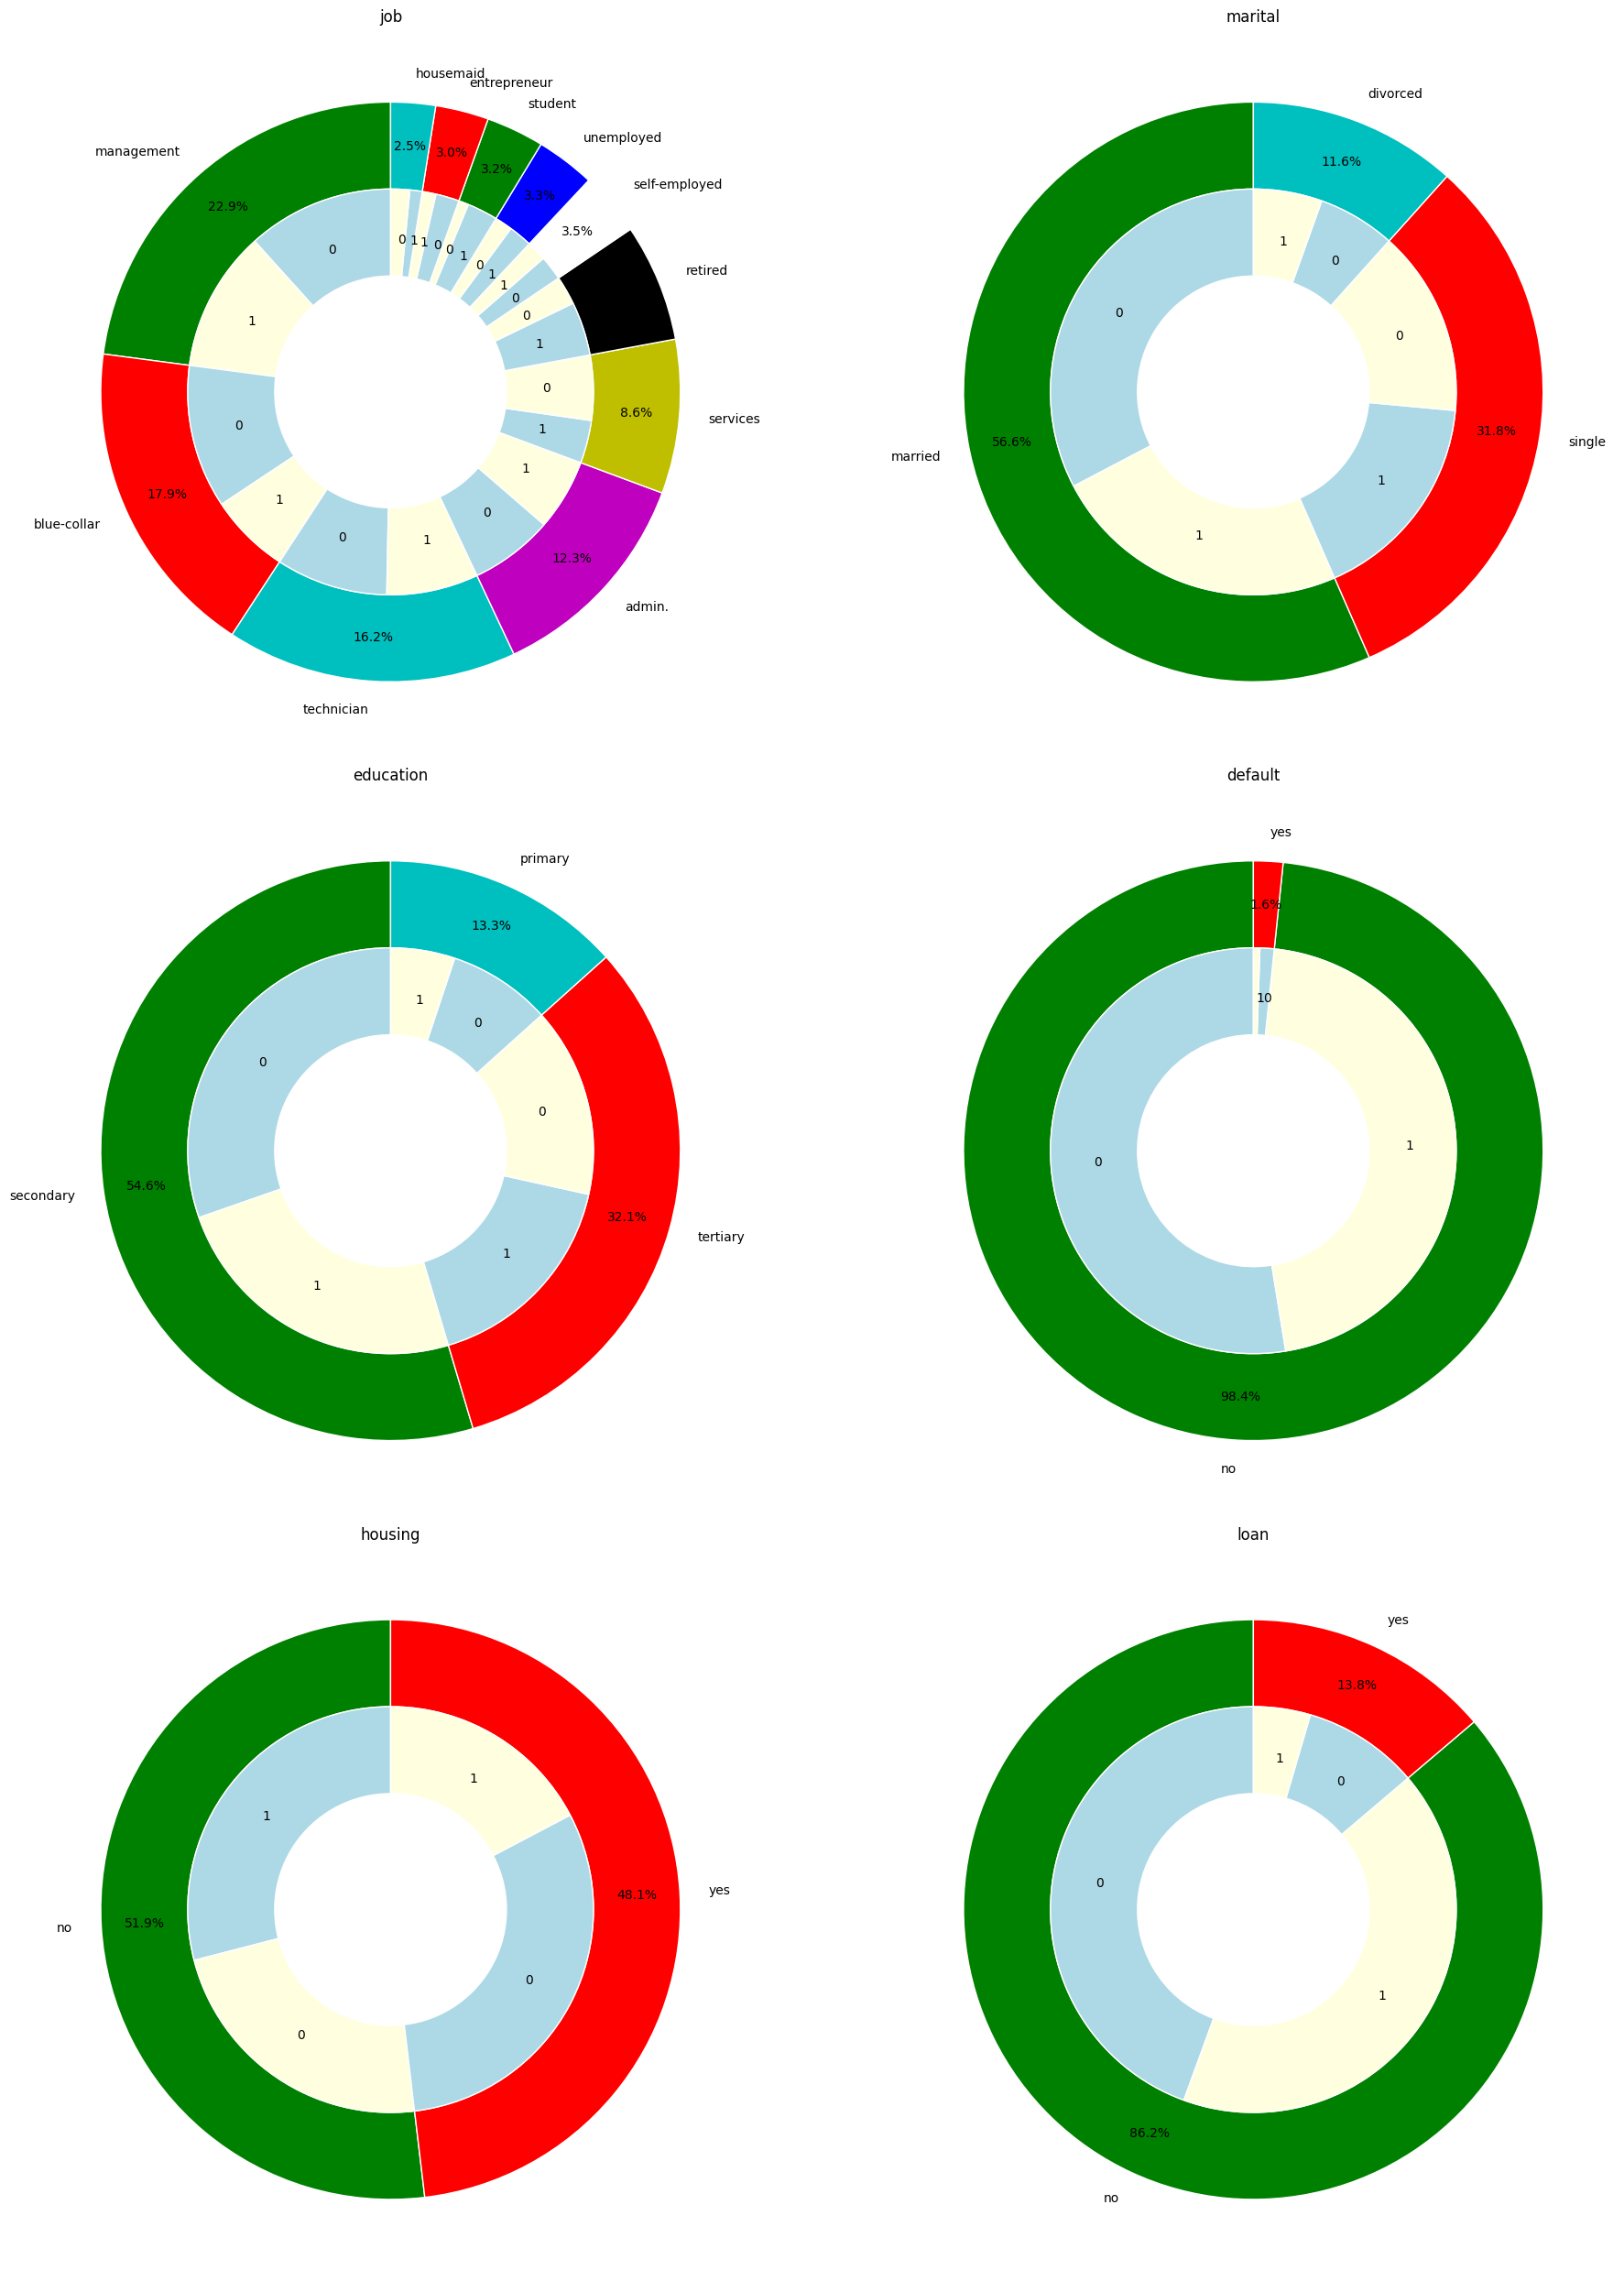

In [142]:
fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(20,25))

for idx_feature,ax in enumerate(axes.flatten()):
    name_feature = cat_list[idx_feature]
    visual_cat_feature(data=df,name_feature=name_feature,axes=ax)

plt.tight_layout()    
plt.show()

На круговых диаграммах на внешнем круге отображены доля в процентах каждого уникального значения в признаке, а во внутреннем круге показано целевое значение по каждому значению в признаке, где $1$-наличие депозита, $0$-его отсутствие.


>На графике по признаку *marital* клиенты со статусом *married* менее склонны к открытию депозита. Такое же отношение можно заменить у людей с кредитом на жильё *housing*, кредитом на личные нужды *loan* и просроченой задолжностью *default*.

### 2.3. Обнаружение зависимостей с целевым признаком.

#### 2.3.1. **poutcome**

❓ для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.

In [143]:
# Узнаем, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
types = df.groupby('poutcome')['deposit'].value_counts(normalize=False).unstack()
types 

deposit      0     1
poutcome            
failure    562   547
other      216   265
success     84   861
unknown   4562  3008

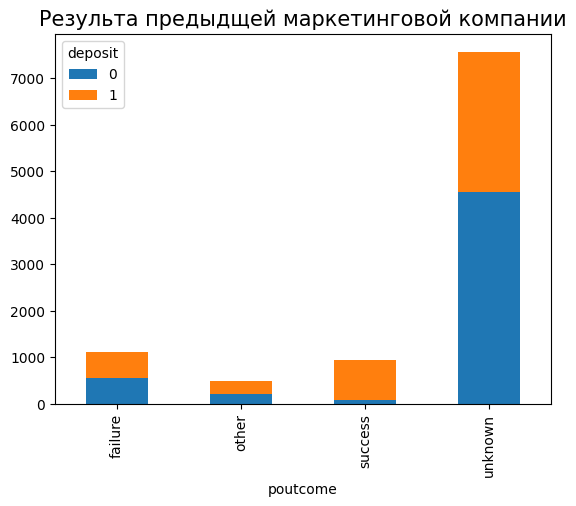

In [144]:
types.plot(kind='bar',stacked=True)
plt.title("Результа предыдщей маркетинговой компании",fontsize=15);

>Как результат значение признака *poutcome* со статусом *success* успехов намного больше, чем неудач.

#### 2.3.2. **month**

Ответим на вопрос:
- в каком месяце чаще всего отказывались от предложения открыть депозит.

In [145]:
month = df[df['deposit']==0]['month'].value_counts(normalize=True)*100
month.head(3)

may    32.743363
jul    15.412979
aug    14.288348
Name: month, dtype: float64

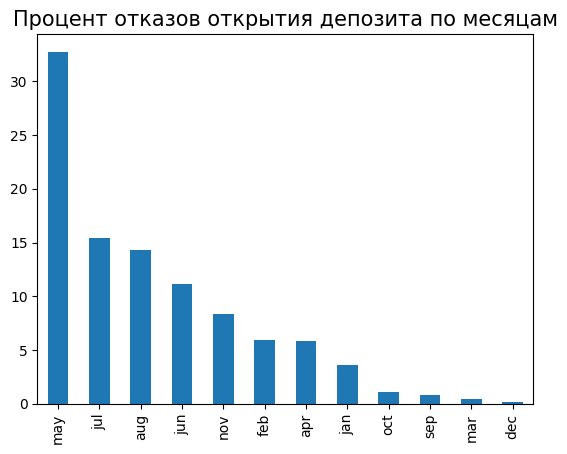

In [146]:
month.plot(kind='bar')
plt.title("Процент отказов открытия депозита по месяцам",fontsize=15);

>В мае месяце клиенты чаще всего отказывались открыть депозит. На этот месяц приходится $32.7\%$ отказов. Следует рассмотреть это  месяц как менее подходящий для проведения маркетинговой компании. Причиной может служит, сезон летних отпусков и турестических поездок.

#### 2.3.3. **age**

Создадим возрастные группы и определим, в каких группах более склонны открыть депозит, чем отказаться от предложения.

In [147]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
df.groupby('age')['deposit'].value_counts().unstack()

deposit    0     1
age               
18       1.0   7.0
19       2.0  11.0
20       5.0  14.0
21       8.0  21.0
22       8.0  40.0
..       ...   ...
89       1.0   NaN
90       NaN   2.0
92       NaN   2.0
93       NaN   2.0
95       NaN   1.0

[76 rows x 2 columns]

Перекодируем признак *age* по возрстным группам:
- <30;
- 30-40;
- 40-50;
- 50-60;
- 60+.


In [148]:
# Перекодируем данные по группам
df['age_group'] = pd.cut(df.age,[0,30,40,50,60,9999],labels=['<30','30-40','40-50','50-60','60+'])

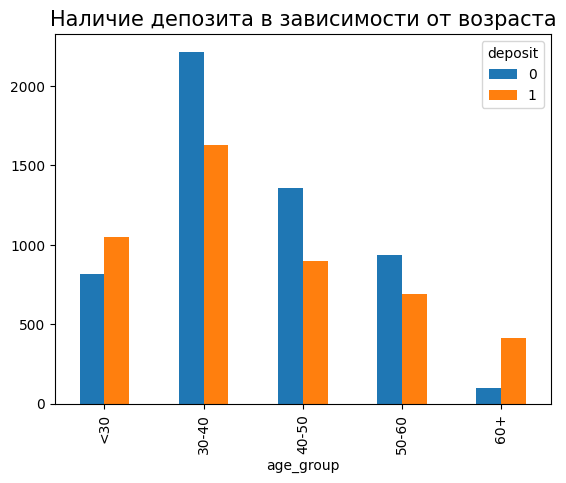

In [149]:
# Группируем данные
age_group = df.groupby('age_group')['deposit'].value_counts().unstack()
# визуализируем данные
age_group.plot(kind='bar');
plt.title('Наличие депозита в зависимости от возраста',fontsize=15);

>Клиенты в возрасте до 30 лет и старше 60 более склоны к открытию депозита.

In [150]:
# Удалим признак balance_group
df.drop('age_group',axis=1,inplace=True)

#### 2.3.4. **marital**

Построим визуализацию для открывших и неоткрывших депозит в зависимости от семейного статуса.

In [151]:
marital = df.groupby('marital')['deposit'].value_counts().unstack()
marital

deposit      0     1
marital             
divorced   624   553
married   3303  2412
single    1497  1716

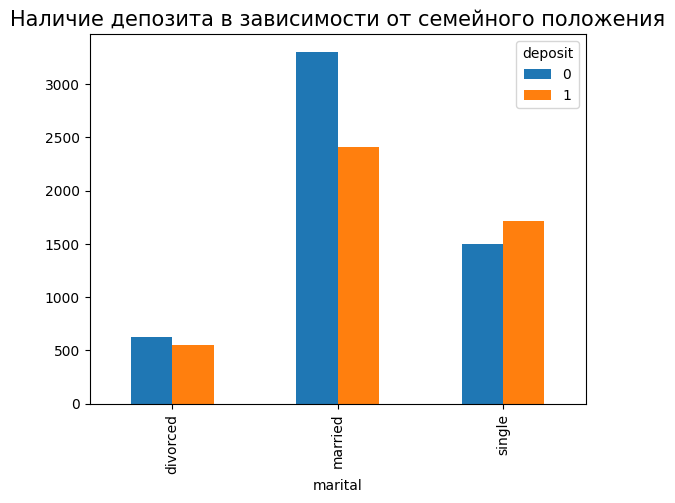

In [152]:
marital.plot(kind='bar');
plt.title('Наличие депозита в зависимости от семейного положения',fontsize=15);

>Клиенты с cемейным положением *single*(одиночка) больше остальных групп имеют склонность к открытию депозита.

#### 2.3.5. **education**

Построим визуализацию для открывших и неоткрывших депозит в зависимости от образования.

In [153]:
education = df.groupby('education')['deposit'].value_counts().unstack()
education

deposit       0     1
education            
primary     832   517
secondary  3066  2451
tertiary   1526  1713

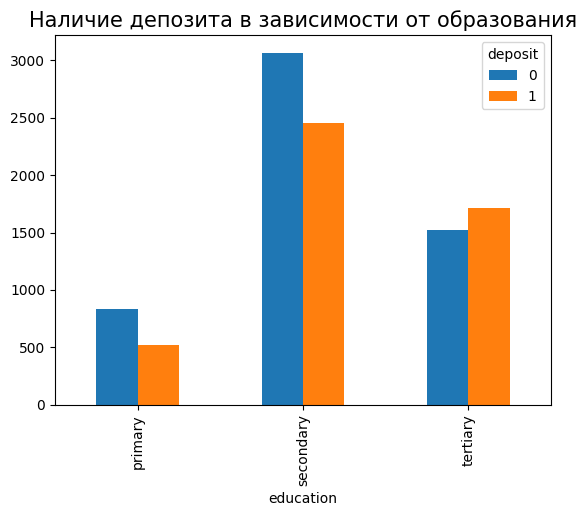

In [154]:
education.plot(kind='bar');
plt.title('Наличие депозита в зависимости от образования',fontsize=15);

>Клиенты с оброзованием *tertary*(высшее) больше остальных групп имеют склонность к открытию депозита.

#### 2.3.6. **job**

Построим визуализацию для открывших и неоткрывших депозит в вида профессиональной занятости.

In [155]:
job = df.groupby('job')['deposit'].value_counts().unstack()
job

deposit           0     1
job                      
admin.          672   574
blue-collar    1155   652
entrepreneur    189   111
housemaid       153    99
management     1180  1135
retired         231   432
self-employed   197   161
services        523   345
student          81   245
technician      900   738
unemployed      143   189

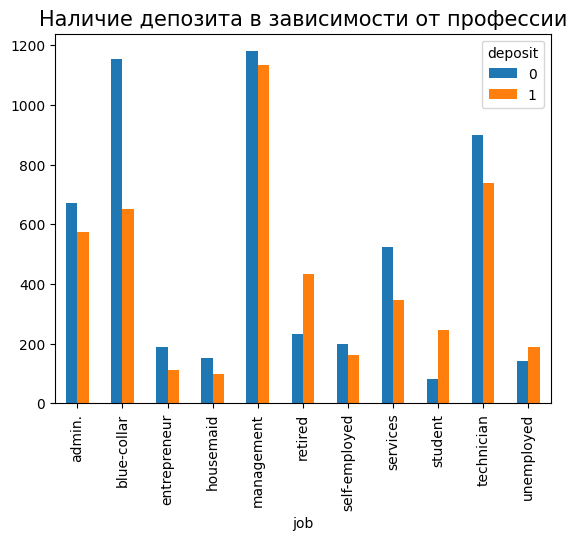

In [156]:
job.plot(kind='bar',);
plt.title('Наличие депозита в зависимости от профессии',fontsize=15);

>Клиенты с профессиональной деятельностью *retired* и *student*, и *unemployed*, показатель открытия депозита выше чем об его отсутствии.

#### 2.3.7. **marital** and **education**

Построим сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны.

In [157]:
data = df.pivot_table(
    index='marital',
    columns='education',
    values='deposit',
    aggfunc='sum'
)
data

education  primary  secondary  tertiary
marital                                
divorced        96        283       174
married        339       1289       784
single          82        879       755

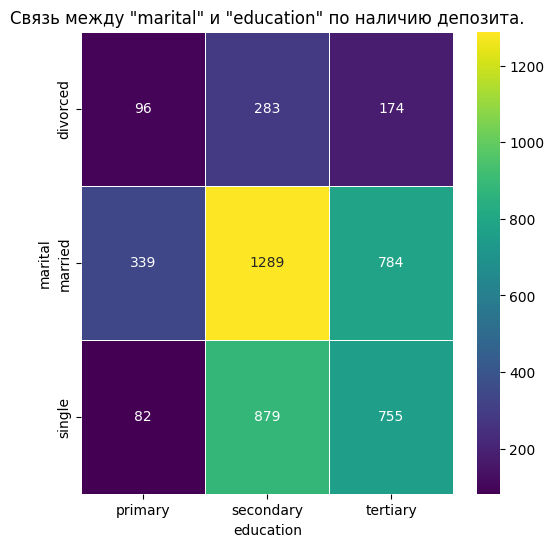

In [158]:
plt.subplots(figsize=(6,6))
sns.heatmap(data=data,annot=True,fmt='.5g',linewidths=0.5,cmap='viridis')
plt.title('Связь между "marital" и "education" по наличию депозита.',fontsize=12);

>На графике тепловой карты виды, что клиенты женатые и со средним образование наиболее многочисленны по открыванию депозита.

#### 2.3.8. **balance**

Создадим группы клиентов по *balnce* и определим, в каких группах более склонны открыть депозит, чем отказаться от предложения.

In [159]:
df.balance.describe()

count    10105.000000
mean       807.653538
std        994.151966
min      -2049.000000
25%         95.000000
50%        445.000000
75%       1227.000000
max       4063.000000
Name: balance, dtype: float64

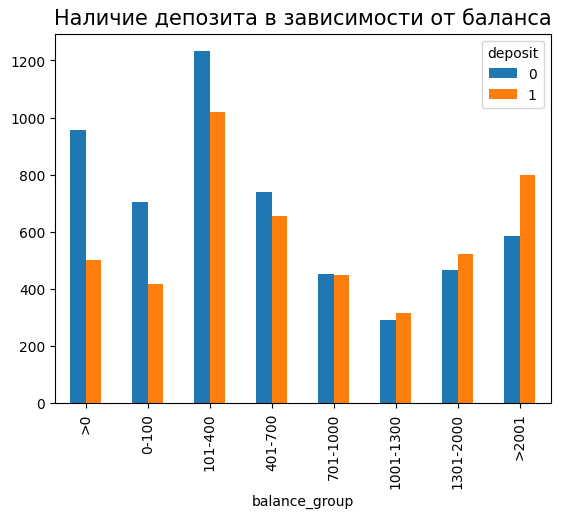

In [160]:
df['balance_group'] = pd.cut(df.balance,[-9999,0,100,400,700,1000,1300,2000,9999],labels=['>0','0-100','101-400','401-700','701-1000','1001-1300','1301-2000','>2001'])
balance_group = df.groupby('balance_group')['deposit'].value_counts().unstack()

balance_group.plot(kind='bar',)
plt.title('Наличие депозита в зависимости от баланса',fontsize=15);

In [161]:
# Удалим признак balance_group
df.drop('balance_group', axis=1, inplace=True)

## 3. Преобразование данных

### 3.1. Порядковое кодирование(LabelEncoder) *education*.

Закодируем признак *education* порядковым кодирование (LabelEncoder), так как данный признак относится к порядковому катгориальному признаку.

In [162]:
# признак для кодирования
feature = 'education'
# инициализируем энкодер
encoder = LabelEncoder()
# обучаем и преобразуем признак
lb_data = encoder.fit_transform(df[feature])
# заносим данные в DataFrame
df[feature]=lb_data

### 3.2. Кодирование бинарных признаков *loan*, *default*, *housing*.

Преобразуйте бинарные переменные в представление из нулей и единиц. К ним относятся признаки *default*, *housing*, *loan*.

In [163]:
df.describe(include='object')

job  marital default housing   loan   contact  month poutcome
count        10105    10105   10105   10105  10105     10105  10105    10105
unique          11        3       2       2      2         3     12        4
top     management  married      no      no     no  cellular    may  unknown
freq          2315     5715    9939    5243   8712      7283   2617     7570

In [164]:
columns_to_change = ['loan', 'default',
                     'housing']

for column in columns_to_change:
    print('Уникальные значений признака {}: '.format(
        column), df[column].unique())

Уникальные значений признака loan:  ['no' 'yes']
Уникальные значений признака default:  ['no' 'yes']
Уникальные значений признака housing:  ['yes' 'no']


Преобразуем бинарные переменные, где *yes*: 1, а *no*: 0.

In [165]:
for column in columns_to_change:
    df[column] = df[column].map({'yes':1,'no':0})

### 3.3. Однократное кодирование *job*, *marital*, *conact*, *month*, *poutcome*.

Закодируем оставшие категориальные номинальные признаки.

In [166]:
# создайте дамми-переменные 
df = pd.get_dummies(df)

### 3.4. Отбор признаков.

#### 3.4.1. Матрица корреляции признаков.

Построим корреляционную матрицу и оценим данные на предмет наличия мультиколлинеарности.

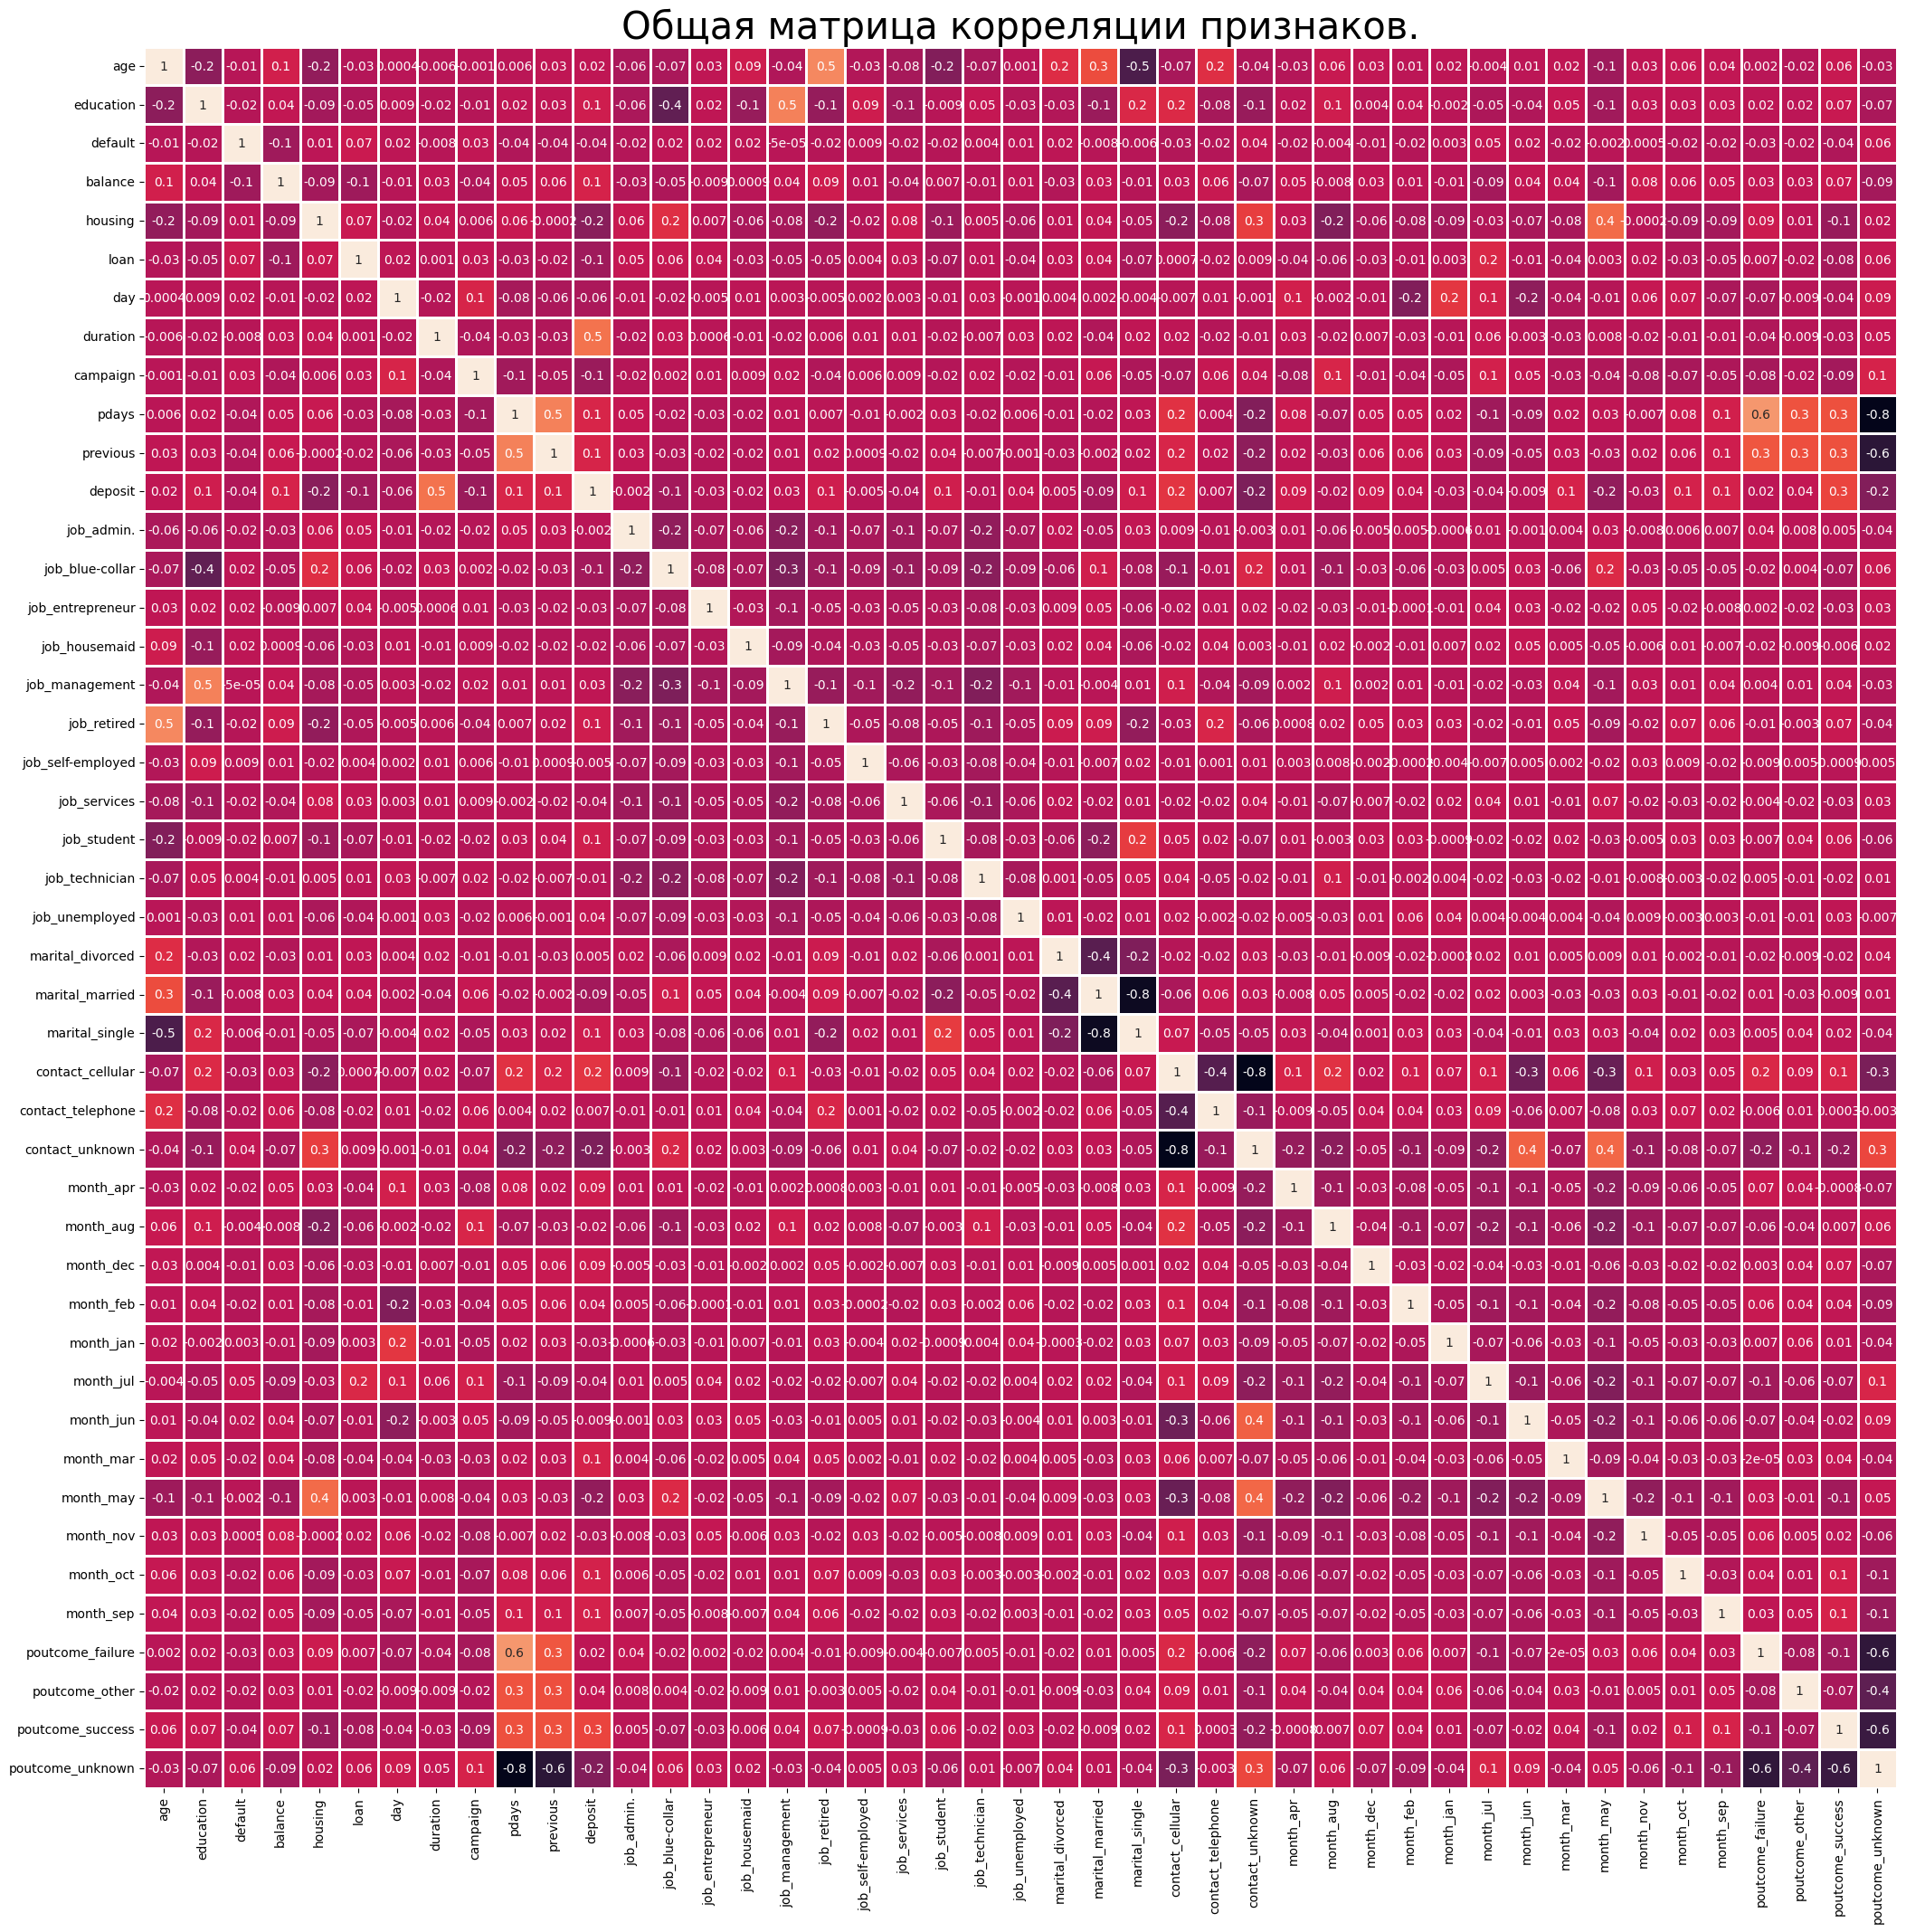

In [167]:
plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,fmt='.1g',linewidths=1,cbar=False)
plt.title('Общая матрица корреляции признаков.',fontsize=30);

>Из таблице видно, что в ней нет признаков с мультиколеарностью, где значение $\geq 0.9$, следовательно *DataFrame* оставим без изменения.

Кореляция признаков с *deposit*. Топ-5 признаков.

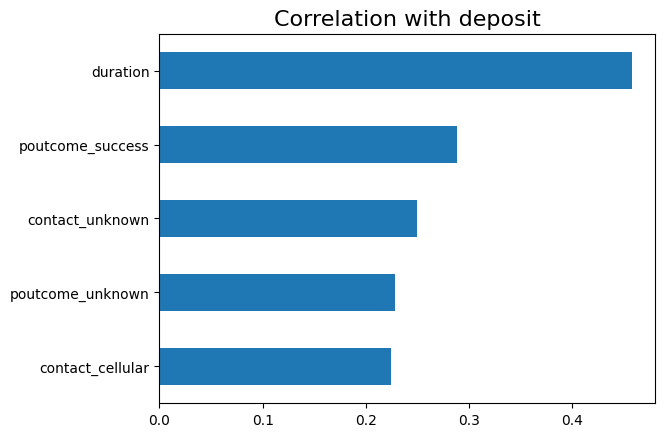

In [168]:
df.corr()["deposit"].apply(lambda x: abs(x)).sort_values()[-6:-1].plot.barh()
plt.title("Correlation with deposit", fontsize = 16)
plt.show()

>У *deposit* с признаками *duration* и *poutcome_success* наблюдается слабая связь, с остальными очень слабая либо её отсутствие.

#### 3.4.2. Шкалирование данных.

Разбиваем данные на train и test.

In [169]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

Рассчитаем необходимые показатели.

In [170]:
# Функция визуализации распределения признаков.
def create_graph(data,columns):
    """Функция строит общий график по все колонкам в DataFrame

    Args:
        data (_DataFrame_): Таблица с признаками которую хотим отобразить;
        columns(_list_):    Список признаков которые хотим отобразить.
    """
    # общие параметры графика
    fig, axes = plt.subplots(nrows=1, figsize=(10, 8))
    axes.set_title('Общий график',fontdict={'fontsize':15})

    for colum in columns:
        sns.kdeplot(data=data[colum], ax=axes, label=colum)
    plt.legend()
    return 0

0

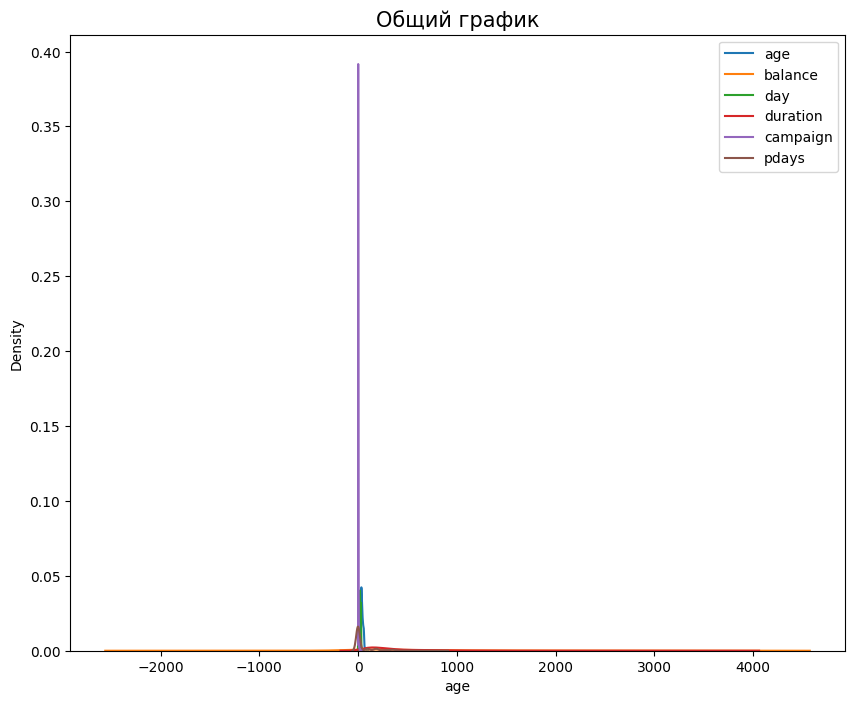

In [171]:
# Построим общий график.
cols_to_scaled = ['age', 'balance', 'day', 'duration','campaign',
        'pdays']
create_graph(X_train,columns=cols_to_scaled)

>Как видно на графике данные разной размерности и очень сильно растянуты. 

Нормализуем наши данные с помощью *MinMaxScaler()*.

In [172]:
X_train_scaled=X_train.copy()
X_test_scaled=X_test.copy()
# Шкалируе данные методом MinMaxScaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train[cols_to_scaled])                           # fit() только на train данных
data_train_scaled = scaler.transform(X_train[cols_to_scaled])    # fransform() на train данных
data_test_scaled = scaler.transform(X_test[cols_to_scaled])      # fransform() на test данных
# Меняем значение в колонках на шкалированные
X_train_scaled[cols_to_scaled] = data_train_scaled
X_test_scaled[cols_to_scaled] = data_test_scaled
X_train_scaled.head(3)

age  education  default   balance  housing  loan       day  \
7287  0.213333          2        0  0.426374        1     0  0.500000   
4766  0.213333          2        0  0.346531        0     1  0.800000   
5712  0.200000          2        0  0.335242        1     0  0.133333   

      duration  campaign     pdays  ...  month_jun  month_mar  month_may  \
7287  0.131735   0.00000  0.000000  ...          0          0          0   
4766  0.075793   0.00000  0.240936  ...          0          0          0   
5712  0.102346   0.02381  0.419883  ...          0          0          1   

      month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
7287          0          0          0                 0               0   
4766          1          0          0                 1               0   
5712          0          0          0                 0               1   

      poutcome_success  poutcome_unknown  
7287                 0                 1  
4766                 0                 0  
5712                 0                 0  

[3 rows x 44 columns]

Теперь данные нормализованы. Построим общий график распределения.

0

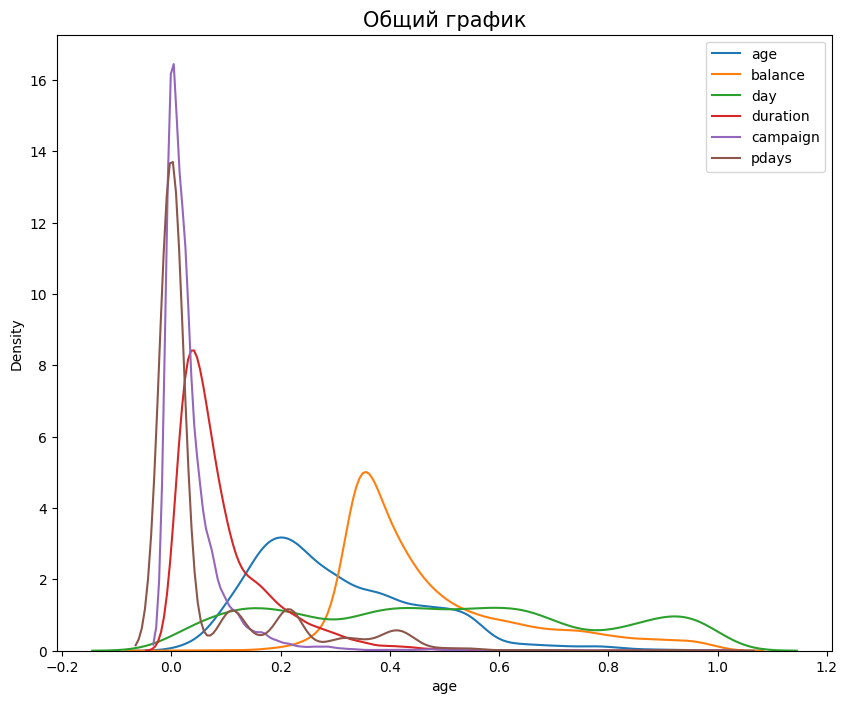

In [173]:
# Строим график.
create_graph(X_train_scaled,columns=cols_to_scaled)

>Теперь данные на графике стали понятными и объктивными, так как они шкалированы в одном диапазоне от $0$ до $1$.

#### 3.4.3. Отбор топ-15 признаков.

С помощью **SelectKBest** отберём 15 наиболее подходящих признаков, в качестве статестической функции используем дисперсионный анализ ANOVA  *f_classif*.

In [174]:
# оставляем 15 наиболее подходящих признаков
selector = SelectKBest(f_classif, k=15)
selector.fit(X_train_scaled, y_train)
# Выведим топ-15 наиболее подходящих признаков.
columns = selector.get_feature_names_out()
print(f'Топ-15 признаков наиболее значимых для целевого признака:\n{columns}')

Топ-15 признаков наиболее значимых для целевого признака:
['balance' 'housing' 'loan' 'duration' 'campaign' 'pdays' 'previous'
 'contact_cellular' 'contact_unknown' 'month_mar' 'month_may' 'month_oct'
 'month_sep' 'poutcome_success' 'poutcome_unknown']


Покажем значимость признаков на графике.

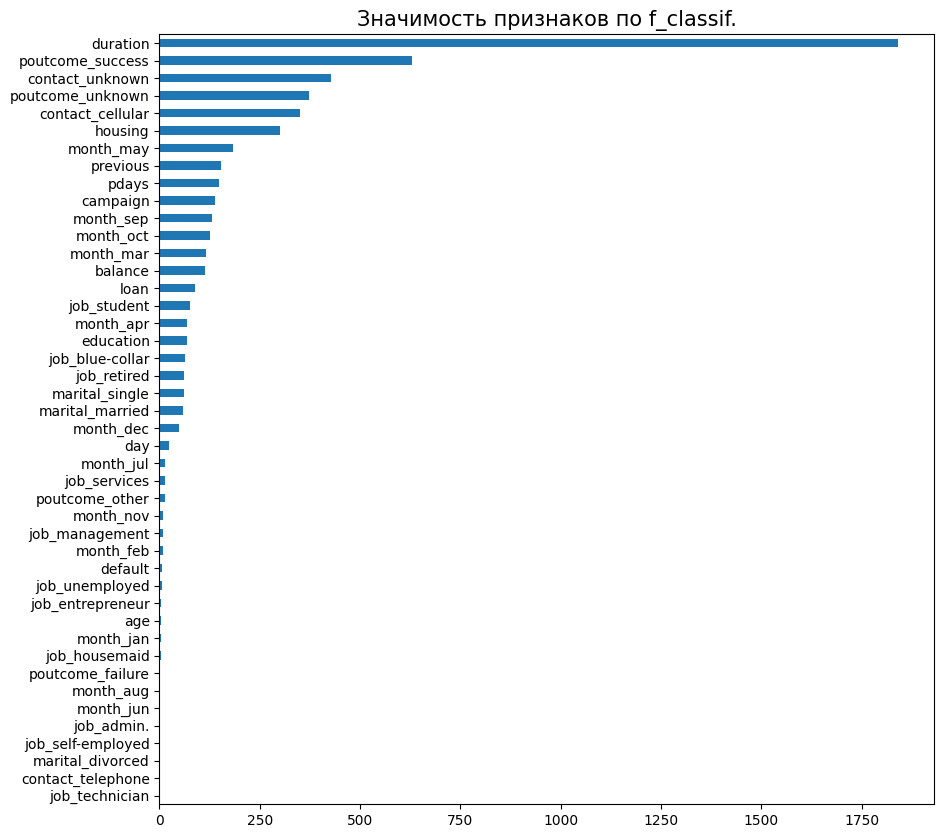

In [175]:
# Построение графика.
plt.figure(figsize=(10,10))
data = pd.Series(f_classif(X_train_scaled, y_train)[0],
                 index=X_train_scaled.columns)
data.sort_values(inplace = True)
data.plot(kind = 'barh')
plt.title("Значимость признаков по f_classif.",fontdict={'fontsize':15});

In [176]:
# Оставляем только топ-15 признаков отобраных SelectBest
X_train_scaled = X_train_scaled[columns]
X_test_scaled = X_test_scaled[columns]

## 4. Моделирование, решение задачи классификации.

Для сохранения результатов отчётов напишем функцию.

In [177]:
# Колонки отчёта
col = pd.MultiIndex.from_product([['1'],
                                  ['precision','recall','f1_score','accuracy']])
# Создаём пустой DataFrame для отчёта
report = pd.DataFrame(columns=col)
# Создаём дополнительные колонки
report['model']=''
report['data']=''
report['learn_time']=''
# Устанавливаем индексы DataFrame
report.set_index(['model','data'],inplace=True)

def log_model_report(model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,n_model='model',add_time=0):
    #фиксируем время обучения модели
    time_start = time.time()
    #обучаем модель
    model.fit(X_train,y_train)
    time_end = time.time()
    learn_time = round(time_end - time_start + add_time, 1)
    
    #делаем предсказание
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #создаём отчёт для train data
    rep_train = metrics.classification_report(y_train,y_train_pred,output_dict=True)['1']
    #округляем значение в словаре
    rep_train = {key:round(val,3) for key,val in rep_train.items()}    
    accuracy = round(metrics.accuracy_score(y_train,y_train_pred),3)
    del rep_train['support']    # удаляем элемент из словаря
    rep_train['accuracy']= accuracy    # добавляем в словарь элемент
    
    #создаём отчёт для test data
    rep_test = metrics.classification_report(y_test,y_test_pred,output_dict=True)['1']
    #округляем значение в словаре
    rep_test = {key:round(val,3) for key,val in rep_test.items()}    
    accuracy = round(metrics.accuracy_score(y_test,y_test_pred),3)
    del rep_test['support']    # удаляем элемент из словаря
    rep_test['accuracy']= accuracy    # добавляем в словарь элемент
    
    #Заносим показатели метрики в DataFrame
    report.loc[(f'{n_model}','train'),'1']=rep_train.values()
    report.loc[(f'{n_model}','test'),'1']=rep_test.values()
    # заносим время в DataFrame
    report.loc[(f'{n_model}','train'),'learn_time']=learn_time
    report.loc[(f'{n_model}','test'),'learn_time']=learn_time
    # report.loc[(f'{n_model}','train'),'0']=
    # report.loc[f'{n_model}','test'),'0']=
    
    # Выводим отчёт можно изменить на любую метрику
    print(f'Модель {n_model} показатели метрик:')
    return report.loc[(f'{n_model}')]

### 4.1. **Модель логистической регрессии.**

Обучим простую модель логистической регрессию и рассчитаем метрики качества.

In [178]:
# создаём модель
simple_LogisticRegression = linear_model.LogisticRegression(
    solver='sag',
    random_state=42,
    max_iter=1000,
)

# Делаем предсказания и выводим метрику
log_model_report(simple_LogisticRegression,X_train_scaled,X_test_scaled,n_model='simple_LogisticRegression')

Модель simple_LogisticRegression показатели метрик:


1                          learn_time
      precision recall f1_score accuracy           
data                                               
train     0.843  0.757    0.798    0.822        0.5
test      0.825  0.731    0.775    0.804        0.5

### 4.2. **Модель дерево решений.**

#### 4.2.1. Построим простую модель класссификации.

Обучим решающие деревья, c максимальной глубиной.

In [179]:
# создаём модель
simple_DecisionTree = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
# Делаем предсказания и выводим метрику
log_model_report(simple_DecisionTree,X_train_scaled,X_test_scaled,n_model='simple_DecisionTree')

Модель simple_DecisionTree показатели метрик:


1                          learn_time
      precision recall f1_score accuracy           
data                                               
train       1.0  0.999      1.0      1.0        0.0
test      0.731   0.74    0.736    0.754        0.0

***GridSearchCV* поиск параметров.**

Подберём оптимальные параметры с помощью *GridSearchCV*.

In [180]:
# задаём сетку параметров 
params_grid = {'criterion': ['entropy','gini'],
               'max_depth': np.arange(5,15,1),
               'min_samples_leaf':np.arange(5,15,1),
               }

# создаём обьект GridSearchCV
DecisionTree_with_GridSearchCV = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42),
    param_grid=params_grid,
    cv=5,
    n_jobs=-1,
    return_train_score=True
)

# Делаем предсказания и выводим метрику
log_model_report(DecisionTree_with_GridSearchCV,X_train_scaled,X_test_scaled,n_model='DecisionTree_with_GridSearchCV')

Модель DecisionTree_with_GridSearchCV показатели метрик:


1                          learn_time
      precision recall f1_score accuracy           
data                                               
train     0.831  0.812    0.821    0.836        5.0
test      0.793  0.772    0.782    0.801        5.0

> Поиск параметров с помощью GridSearchCV показал, что наилучший показатель метри на тестовых данных, является f1_score = 0.801.

Покажем на графике как глубина дерева влияет на метрику *Score*. 

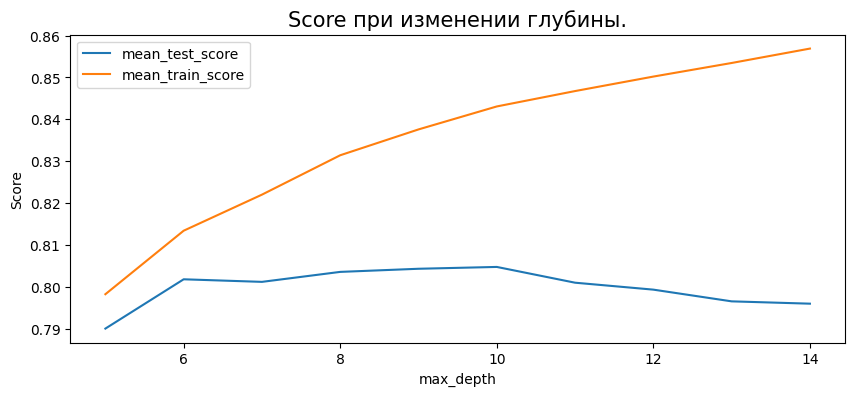

In [181]:
# создадим DataFrame с результатами перебора параметров
results  = pd.DataFrame(DecisionTree_with_GridSearchCV.cv_results_)
# Извлекаем атрибуты модели из колонки 'params'
temp = pd.DataFrame(DecisionTree_with_GridSearchCV.cv_results_['params'])
results = pd.concat([results,temp],axis=1).drop('params',axis=1)

# Групируем данные для графика
data = results.groupby('max_depth')[['mean_test_score','mean_train_score']].mean()
# Строим график
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data['mean_test_score'], label='mean_test_score')
ax.plot(data['mean_train_score'], label='mean_train_score')
ax.set_xlabel('max_depth')
ax.set_ylabel('Score')
ax.legend()
ax.set_title('Score при изменении глубины.',fontsize=15);

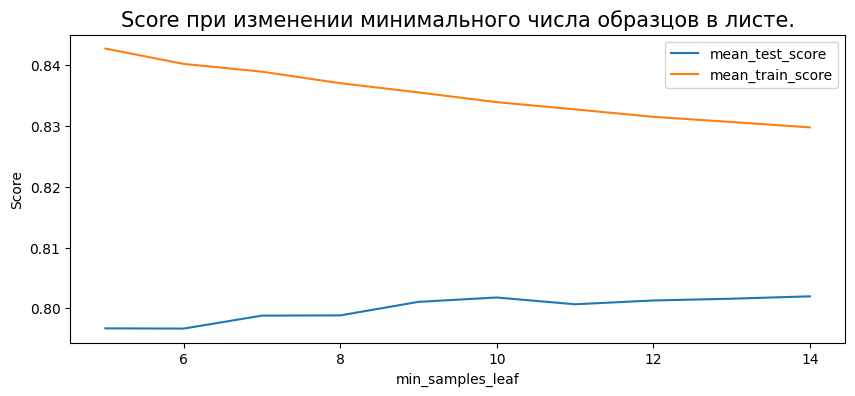

In [182]:
data = results.groupby('min_samples_leaf')[['mean_test_score','mean_train_score']].mean()
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data['mean_test_score'], label='mean_test_score')
ax.plot(data['mean_train_score'], label='mean_train_score')
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('Score')
ax.legend()
ax.set_title('Score при изменении минимального числа образцов в листе.',fontsize=15);

Цель перебора параметров минимизировать переобучение модели и максимизировать тестовую метрику *f1_score*(снизить показатель недообучения)

>На графиках можно заметит:
- при увеличении глубины дерева увеличивается разница между *mean_test_score* и *mean_train_score*. Показатель перебучение увеличивается. 
- при увеличении *min_samples_leaf* наоборот. Показатель перебучение уменьшается.

Как результат поиска *GridSearchCV* оптиvальными параметрам модели являются: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 13}

## 5. Решение задачи классификации: ансамбли моделей и построение прогноза

### 5.1. **Модель ансамблей случайного леса.**

Построим модель: ансамбли моделей случайного леса.

In [183]:
# обучите на ваших данных случайный лес
ensemble_RandomForestClassifier = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42,
)

# Делаем предсказания и выводим метрику
log_model_report(ensemble_RandomForestClassifier,X_train_scaled,X_test_scaled,n_model='ensemble_RandomForestClassifier')


Модель ensemble_RandomForestClassifier показатели метрик:


1                          learn_time
      precision recall f1_score accuracy           
data                                               
train     0.829  0.855    0.842    0.851        0.6
test      0.803   0.83    0.817    0.827        0.6

>Модель **случайного леса** лучше предсказывает потенциальных клиентов, которые захотят открыть депозит. В резльтате метрика accuracy увеличилась $3\%$ процента.

### 5.2. **Модель градиентного бустинга.**

Используем для классификации градиентный бустинг и сравните качество со случайным лесом

In [184]:
# Создаём простую модель для бустинга
# Создаем объект класса дерева решений
dt = tree.DecisionTreeClassifier(
    max_depth=3, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Создаем объект класса AdaBoost
ensemble_AdaBoostClassifier = ensemble.AdaBoostClassifier(
    estimator=dt, #базовая модель
    random_state=42, #датчик генератора случайных чисел
    n_estimators=50 #количество моделей в ансамбле
)

# Делаем предсказания и выводим метрику
log_model_report(ensemble_AdaBoostClassifier,X_train_scaled,X_test_scaled,n_model='ensemble_AdaBoostClassifier')

Модель ensemble_AdaBoostClassifier показатели метрик:


1                          learn_time
      precision recall f1_score accuracy           
data                                               
train     0.848  0.865    0.856    0.866        0.3
test      0.777  0.796    0.786    0.799        0.3

Оценим, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга.

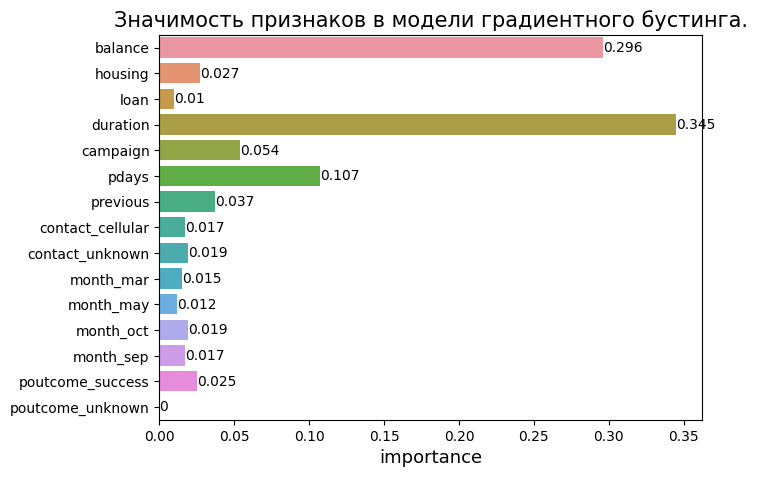

In [185]:
# Заносим массив имён и значений в переменные
feature_names = ensemble_AdaBoostClassifier.feature_names_in_
feature_importances = ensemble_AdaBoostClassifier.feature_importances_.round(3)

# Построения графика
plt.figure(figsize=(7,5))
ax = sns.barplot(x=feature_importances,y=feature_names)
plt.title('Значимость признаков в модели градиентного бустинга.',fontdict={'fontsize':15});
plt.xlabel('importance',fontdict={'fontsize':13});
ax.bar_label(ax.containers[0], fontsize=10);

>Как результат **модель градиентого бустинга** показала результат (*test_data accuracy*: $0.8$) ниже чем , модель случайного леса (*test_data accuracy*: $0.83$)

### 5.3. **Модель стекинга.**

Объедините уже известные вам алгоритмы с помощью стекинга.

In [186]:
estimators = [
    ('dt', tree.DecisionTreeClassifier(
        criterion='entropy',
        min_samples_leaf=5,
        max_depth=6,
        random_state=42
        )
    ),
    ('log_reg', linear_model.LogisticRegression(
        solver='sag',
        random_state=42 
        )
    ),
    ('gb', ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        n_estimators=300,
        min_samples_leaf=5,
        max_depth=5,
        random_state=42
        )
    ),
]

ensemble_StackingClassifier = ensemble.StackingClassifier(
    estimators,
    final_estimator=ensemble.RandomForestClassifier(
        n_estimators=100,
        criterion='gini',
        min_samples_leaf=5,
        max_depth=10,
        random_state=42)
)

# Делаем предсказания и выводим метрику
log_model_report(ensemble_StackingClassifier,X_train_scaled,X_test_scaled,n_model='ensemble_StackingClassifier')

Модель ensemble_StackingClassifier показатели метрик:


1                          learn_time
      precision recall f1_score accuracy           
data                                               
train     0.829  0.859    0.844    0.853       15.4
test      0.797  0.832    0.814    0.824       15.4

Модель стекинга показала показала результат немного хуже, чем модель ансамблей случайного леса, где:
- *test_data f1_score* 0.825 против 0.827 соответсвенно.

In [187]:
report

1                           \
                                      precision recall f1_score accuracy   
model                           data                                       
simple_LogisticRegression       train     0.843  0.757    0.798    0.822   
                                test      0.825  0.731    0.775    0.804   
simple_DecisionTree             train       1.0  0.999      1.0      1.0   
                                test      0.731   0.74    0.736    0.754   
DecisionTree_with_GridSearchCV  train     0.831  0.812    0.821    0.836   
                                test      0.793  0.772    0.782    0.801   
ensemble_RandomForestClassifier train     0.829  0.855    0.842    0.851   
                                test      0.803   0.83    0.817    0.827   
ensemble_AdaBoostClassifier     train     0.848  0.865    0.856    0.866   
                                test      0.777  0.796    0.786    0.799   
ensemble_StackingClassifier     train     0.829  0.859    0.844    0.853   
                                test      0.797  0.832    0.814    0.824   

                                      learn_time  
                                                  
model                           data              
simple_LogisticRegression       train        0.5  
                                test         0.5  
simple_DecisionTree             train        0.0  
                                test         0.0  
DecisionTree_with_GridSearchCV  train        5.0  
                                test         5.0  
ensemble_RandomForestClassifier train        0.6  
                                test         0.6  
ensemble_AdaBoostClassifier     train        0.3  
                                test         0.3  
ensemble_StackingClassifier     train       15.4  
                                test        15.4

## 6. Проведём поиск лучших гиперпараметров с помощью *Optuna*.

Напишем функцию для *Optuna*.

In [188]:
# зафксируем random_state
random_state = 42
def optuna_rf(trial):
    # задаём пространство поиска гиперпараметров
    n_estimators = trial.suggest_int("n_estimators",100, 200, 1)
    min_samples_leaf = trial.suggest_int("min_samples_leaf",2, 10, 1)
    max_depth = trial.suggest_int("max_depth",10, 30, 1)

  
    # используем эту комбинацию для построения модели
    model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                            min_samples_leaf=min_samples_leaf,
                                            max_depth=max_depth,
                                            random_state=random_state)

    # обучаем модель
    model.fit(X_train_scaled, y_train)
    # score = metrics.accuracy_score(y_train, model.predict(X_train))
    
    # обучать модель можно также с помощью кросс-валидации
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()    
    
    return score

In [189]:
%%time
start_time = time.time()
# создаём объет исследования
# Можем напрямую указать, что нам необходимо максимизировать direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifer",direction="maximize")

# ищем лучшую комбинацию гиперпараметров n_trails раз
study.optimize(optuna_rf,n_trials=20)
end_time = time.time()
add_time = end_time-start_time

[I 2024-05-28 15:12:56,578] A new study created in memory with name: RandomForestClassifer
[I 2024-05-28 15:12:57,946] Trial 0 finished with value: 0.8299852289512556 and parameters: {'n_estimators': 130, 'min_samples_leaf': 3, 'max_depth': 20}. Best is trial 0 with value: 0.8299852289512556.
[I 2024-05-28 15:12:59,240] Trial 1 finished with value: 0.8301329394387 and parameters: {'n_estimators': 124, 'min_samples_leaf': 2, 'max_depth': 24}. Best is trial 1 with value: 0.8301329394387.
[I 2024-05-28 15:13:00,139] Trial 2 finished with value: 0.8295420974889218 and parameters: {'n_estimators': 104, 'min_samples_leaf': 4, 'max_depth': 30}. Best is trial 1 with value: 0.8301329394387.
[I 2024-05-28 15:13:01,149] Trial 3 finished with value: 0.8295420974889218 and parameters: {'n_estimators': 130, 'min_samples_leaf': 5, 'max_depth': 14}. Best is trial 1 with value: 0.8301329394387.
[I 2024-05-28 15:13:02,465] Trial 4 finished with value: 0.8280649926144756 and parameters: {'n_estimators': 

CPU times: total: 4.48 s
Wall time: 25.4 s


Теперь используем найденые праметры для обучения модели и расчитаем *accuracy_score*.

In [190]:
# рассчитаем точность для тестовой выборки
RandomForestClassifier_with_Optuna = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state)

# Делаем предсказания и выводим метрику
log_model_report(RandomForestClassifier_with_Optuna,X_train=X_train_scaled,X_test=X_test_scaled,n_model='RandomForestClassifier_with_Optuna',add_time=add_time)

Модель RandomForestClassifier_with_Optuna показатели метрик:


1                          learn_time
      precision recall f1_score accuracy           
data                                               
train     0.828  0.861    0.844    0.853       25.9
test      0.806  0.834    0.819     0.83       25.9

Визуализируем ход подбора гиперпараметров.

In [191]:
optuna.visualization.plot_optimization_history(study,target_name="accuracy_score")

График важности гиперпараметров - помогает понять, какие гиперпараметры вносят больший вклад в минимизацию/максимизацию метрики.

In [192]:
optuna.visualization.plot_param_importances(study, target_name="f1_score")

График отношения гиперпараметров

Он показывает связь между различными комбинациями гиперпараметров и значение метрики для этих гиперпараметровдля этих комбинаций в виде контурного графика.

In [193]:
optuna.visualization.plot_contour(
    study, params=["max_depth", "min_samples_leaf"], target_name="accuracy_score")

На графике каждая точка соответсвует одному набору гиперпараметров, на котором чем темнее зона тем выше показатель метрики *accuracy*.

## Итоги.


In [194]:
t = report.reset_index()
t[(t['data']=='test')&(t[('1','f1_score')]>=0.81)]

model  data         1                  \
                                             precision recall f1_score   
7      ensemble_RandomForestClassifier  test     0.803   0.83    0.817   
11         ensemble_StackingClassifier  test     0.797  0.832    0.814   
13  RandomForestClassifier_with_Optuna  test     0.806  0.834    0.819   

            learn_time  
   accuracy             
7     0.827        0.6  
11    0.824       15.4  
13     0.83       25.9

Модель *RandomForestClassifier_with_Optuna* показала наилучший результат с точность 0.819 по метрике *f1_score*.

Это не окончатльное решение, можно улучшить результат в дополниельной разработке, применив:
- другие способы заполнения пропусков,
- преобразования данных,
- добавления новых признаков,
- методы шкалирования,
- использовать расширеный поиск параметров с помощью *Optuna*,
- построение новых более сильных моделей,
- для универсальности использования можно создать пайплайны, для быстрового использования и сохранения результатов.
